In [1]:
from __future__ import print_function
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,UpSampling2D
#from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import merge
#keras.layers.Concatenate
#from keras.layers import Concatenate
from keras.layers import Reshape
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [3]:
data_path1 = '/home/apiiit-rkv/Desktop/tot/tottrain/dog/'

In [4]:

imgs1 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path1))
p1=0
for img_name in filenames:
    img = plt.imread(data_path1 + img_name)
    img  = np.resize(img, (256, 256))
    if p1==0:
      imgs1=(img)
      p1=1
    else:
      imgs1 = np.append(imgs1, img, axis=0)
print(imgs1.shape)

(30720, 256)


In [5]:
imgs1 = np.reshape(imgs1, [ 120, 256, 256])


In [6]:
train_images1, test_images1 = train_test_split(imgs1,test_size=0.20, random_state=42)


In [7]:
print(train_images1.shape)
print(test_images1.shape)

(96, 256, 256)
(24, 256, 256)


In [8]:
nRows1,nCols1 = train_images1.shape[1:]
nDims1 = nRows1


In [9]:
train_data1 = train_images1.reshape(train_images1.shape[0], nRows1, nCols1, 1)
test_data1 = test_images1.reshape(test_images1.shape[0], nRows1, nCols1, 1)

In [10]:
input_shape1 = (nRows1, nCols1, 1)
train_data1 = train_data1.astype('float32')
test_data1 = test_data1.astype('float32')

print(input_shape1)

(256, 256, 1)


In [11]:
train_data1 /= 255
test_data1 /= 255


In [12]:
def encoder1(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    encoded1 = MaxPooling2D((2,2), padding='same', name='encoder')(x)
    return encoded1
def decoder1(input_shape):
    encoded=encoder1(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded1 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded1
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto1')
input_shape = Input(shape = [256,256,1])
model1 = Model(input_shape,decoder1(input_shape))
#model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model1.summary()


Starting auto1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Starting autoencoder
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 8)         584   

In [13]:
batch_size = 2
epochs = 1
history = model1.fit(train_data1,train_data1,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_data1, test_data1))
model1.evaluate(test_data1, test_data1,verbose=0)


Train on 96 samples, validate on 24 samples
Epoch 1/1
96/96 [==============================] - 11s 115ms/step - loss: 0.6863 - accuracy: 0.0113 - val_loss: 0.6637 - val_accuracy: 0.0121


[0.6637366414070129, 0.01213200856000185]

In [13]:
data_path2 = '/home/apiiit-rkv/Desktop/tot/tottrain1/horse/'

In [14]:
imgs2 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path2))
p2=0
for img_name in filenames:
    img = plt.imread(data_path2 + img_name)
    img  = np.resize(img, (256, 256))
    if p2==0:
      imgs2=(img)
      p2=1
    else:
      imgs2 = np.append(imgs2, img, axis=0)
print(imgs2.shape)

(30720, 256)


In [15]:
imgs2 = np.reshape(imgs2, [ 120, 256, 256])
train_images2, test_images2 = train_test_split(imgs2, test_size=0.33, random_state=42)
nRows2,nCols2 = train_images2.shape[1:]
nDims2 = nRows2
train_data2 = train_images2.reshape(train_images2.shape[0], nRows2, nCols2, 1)
test_data2 = test_images2.reshape(test_images2.shape[0], nRows2, nCols2, 1)
input_shape2 = (nRows2, nCols2, 1)
train_data2 = train_data2.astype('float32')
test_data2 = test_data2.astype('float32')
train_data2 /= 255
test_data2 /= 255

In [2]:
import tensorflow.keras
def encoder2(input_shape):
    x = Conv2D(16,(3,3), activation='relu', padding='same')(input_shape)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
    encoded2 = MaxPooling2D((2,2), padding='same', name='encoder0')(x)
    return encoded2
def decoder2(input_shape):
    encoded=encoder2(input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded2
    #model.add(BatchNormalization(axis=-1))
    #decode=model.add(Activation('relu'))
print ('Starting auto2')
input_shape = Input(shape = [256,256,1])
model2 = Model(input_shape,decoder2(input_shape))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Starting autoencoder')
model2.summary()


Starting auto2
Starting autoencoder
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
encoder0 (MaxPooling2D)

In [3]:
batch_size = 2
epochs = 2
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
history2 = model2.fit(train_data2,train_data2,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_data2, test_data2))
model2.evaluate(test_data2, test_data2,verbose=0)


NameError: name 'train_data2' is not defined

In [17]:
a=Flatten()(encoder1(input_shape))
b=Flatten()(encoder2(input_shape))

In [18]:
print(a)

Tensor("flatten_1/Reshape:0", shape=(None, None), dtype=float32)


In [19]:
print(b)

Tensor("flatten_2/Reshape:0", shape=(None, None), dtype=float32)


In [20]:
merged_model1 = keras.layers.concatenate([a,b],axis=0)
def final(merged_model1):
    #merged_model=Dense(512, activation='relu')(merged_model1)
    merged_model=Dense(256, activation='relu')(merged_model1)
    merged_model=Dense(128, activation='relu')(merged_model)
    merged_model=Dropout(0.2)(merged_model)
    merged_model=Dense(2, activation='softmax')(merged_model)
    return merged_model
z=final(merged_model1)

In [21]:
final_model=Model(input_shape,final(merged_model1))

In [22]:
final_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 16) 0           conv2d_15[0][0]                  
____________________________________________________________________________________________

In [23]:
data_path4 = '/home/apiiit-rkv/Desktop/TRAIN/'

In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt
imgs4 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path4))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(data_path4 + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor', 'hor'

(61440, 256)

In [25]:
imgs4 = np.reshape(imgs4, [ 240, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)


(160, 256, 256)
(80, 256, 256)


In [26]:
import numpy as np
imgs = np.reshape(imgs4, [ 240, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (160, 256, 256) 160
Testing data shape :  (80, 256, 256) 80
Total number of outputs :  3
Output classes :  ['dog' 'hor' '0']


(256, 256)


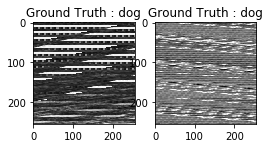

In [27]:
plt.figure(figsize=[4,2])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
print(train_images.shape[1:])

In [28]:
train_labels



['dog',
 'dog',
 'hor',
 'hor',
 'hor',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'hor',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'hor',
 'dog',
 'hor',
 'hor',
 'hor',
 'hor',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'hor',
 'dog',
 'hor',
 'dog',
 'hor',
 'hor',
 'dog',
 'hor',
 'hor',
 'hor',
 'hor',
 'dog',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'hor',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'dog',
 'hor',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'hor',
 'hor',
 'dog',
 'hor',
 'dog',
 'dog',
 'dog',
 'hor',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'dog',
 'hor',
 'dog',
 'hor',
 'hor',
 'hor',
 'hor',
 'dog',
 'dog',
 'dog',
 'dog',
 'hor',
 'hor',
 'hor',
 'hor',
 'hor',
 'hor',
 'hor',
 'dog',
 'dog',


In [29]:

train_labels=[0 if x=='hor' else 1 for x in train_labels]
print(train_labels)
len(train_labels)


[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


160

In [30]:

test_labels=[0 if x=='hor' else 1 for x in test_labels]
print(test_labels)
len(test_labels)


[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0]


80

In [31]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
160
80
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]


In [32]:
from keras import optimizers
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
final_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
#!pip install keras --upgrade

In [34]:
history = final_model.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,verbose=1,validation_data=(test_data, test_labels_one_hot))
#final_model.evaluate(test_data, test_labels_one_hot,verbose=0)
#history = final_model.fit(train_data,train_labels,batch_size=1,epochs=10,verbose=1,validation_data=(test_data,test_labels))
#final_model.evaluate(test_data, test_labels_one_hot,verbose=0)

Train on 160 samples, validate on 80 samples
Epoch 1/20
160/160 [==============================] - 22s 137ms/step - loss: 0.7088 - accuracy: 0.5250 - val_loss: 0.6880 - val_accuracy: 0.5312
Epoch 2/20
160/160 [==============================] - 19s 119ms/step - loss: 0.6947 - accuracy: 0.5437 - val_loss: 0.6612 - val_accuracy: 0.5688
Epoch 3/20
160/160 [==============================] - 19s 122ms/step - loss: 0.6776 - accuracy: 0.6125 - val_loss: 0.6382 - val_accuracy: 0.6938
Epoch 4/20
160/160 [==============================] - 21s 133ms/step - loss: 0.6585 - accuracy: 0.6344 - val_loss: 0.6604 - val_accuracy: 0.6625
Epoch 5/20
160/160 [==============================] - 20s 124ms/step - loss: 0.5888 - accuracy: 0.7094 - val_loss: 0.6054 - val_accuracy: 0.6687
Epoch 6/20
160/160 [==============================] - 19s 120ms/step - loss: 0.5423 - accuracy: 0.7125 - val_loss: 0.5362 - val_accuracy: 0.7437
Epoch 7/20
160/160 [==============================] - 19s 121ms/step - loss: 0.4155 -

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


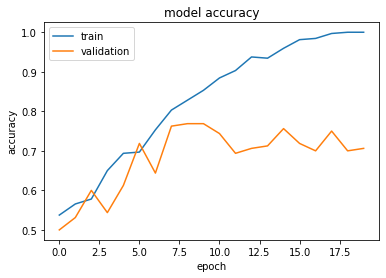

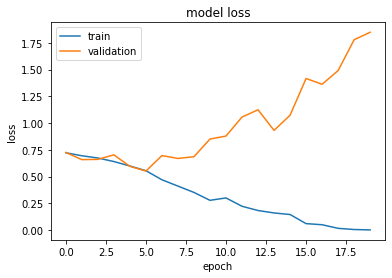

In [35]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
history = final_model.fit(train_data,train_data,batch_size=1,epochs=20,verbose=1,validation_data=(test_data, test_data))

ValueError: Error when checking target: expected dense_6 to have 2 dimensions, but got array with shape (160, 256, 256, 1)

In [41]:
img='/home/apiiit-rkv/Desktop/h.jpeg'
img  = np.resize(img, (256, 256))
img = np.reshape(img, [ 1, 256, 256,1])
#final_model.predict()
img.shape

(1, 256, 256, 1)

In [112]:
imgs0 = np.empty((256, 256), int)
img = plt.imread('/home/apiiit-rkv/Desktop/1.jpeg')
img  = np.resize(img, (256, 256))
#imgs0=img
#print(imgs0.shape)
#imgs0 = np.reshape(imgs0, [ 1, 256, 256])
#print(imgs0.shape)
#imgs0.shape[0]
fin = img.reshape(1, 256, 256, 1)

In [113]:
prediction=final_model.predict(fin,batch_size=None,steps=1)

[[1. 0.]
 [0. 1.]]


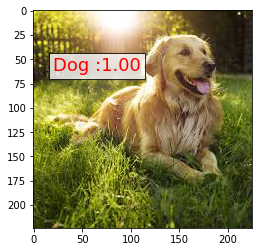

In [114]:
if(prediction[:,:]>0.5).any():
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Horse/:%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

print(prediction)
img = plt.imread('/home/apiiit-rkv/Desktop/1.jpeg')
plt.imshow(img)
plt.show()